# CSE 482: Big Data Analysis (Spring 2019) Homework 1

Due date: January 28, 2019 (before midnight)

Submit your homework using the D2L system. Use the following Jupyter notebook to write the solution of your homework. Make sure you create an HTML version of the solution and **submit both the notebook and its corresponding HTML file.** For the programming portion of the homework, make sure the notebook also includes the results after executing your code. 

**1.**  For each attribute given below, classify its type as nominal, ordinal, interval, or ratio.

    (a) Number of likes for a Youtube video.
    (b) Area code of a territory (e.g., district, county, or city)
    (c) Sound intensity, measured in decibel scale (https://www.britannica.com/science/sound-physics/The-decibel-scale).
    (d) Day of year, whose value is in the range between 1 and 366.
    (e) Hardness of mineral specimens, measured in Mohs' scale (https://geology.com/minerals/mohs-hardness-scale.shtml)
    (f) Temperature in Fahrenheit scale.
    (g) Heart rate of a patient.
    (h) Social security number of a person.

**Solution:**

    (a) Ratio
    (b) Nominal
    (c) Ordinal. The difference between 3dB and 2dB is not the same as the difference between 2dB and 1dB.
    (d) Nominal. Comparison may not work if you compare the days for 2 years. For example Day 3 could be larger than Day 10 if they are from two different years. 
    (e) Ordinal
    (f) Interval. A temperature of 60F is not twice hotter than 30F.
    (g) Ratio
    (h) Nominal
    
---

**2.** State whether it is valid to apply the following operations to the attributes given below (based on the properties of the attribute values). If not valid, state your reason why the operation should not be performed on the attribute.

    (a) Calculating the median household income of the population in a country.
    (b) Calculating the Pearson correlation between SAT score and GPA of students who took a course.
    (c) Calculating the mode of student status (Freshman, Sophomore, Junior, Senior) of undergraduates who had enrolled in CSE 482. 
    (d) Calculating the harmonic mean of user ratings for a movie, where each rating goes from 1 to 5.

**Solution:**

    (a) Valid because income is a ratio attribute.
    (b) Invalid because GPA is an ordinal-valued attribute.
    (c) Valid because student status is an ordinal-valued attribute.
    (d) Invalid because user ratings is an ordinal-valued attribute.

**3.**  Write a python program that performs each of the following steps below:

    (a) Use the Twitter streaming API to collect all the tweets that contain the keyword *happy*. Set the timer for collecting the tweets to 5 minutes (300 secs). Save the tweets in a file named data.json.

**Code:**

In [1]:
######################################################
# Twitter data collection
######################################################

import time
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

C_KEY = 'XXXXXXX'
C_SECRET = 'XXXXXXX'
A_TOKEN_KEY = 'XXXXXXX'
A_TOKEN_SECRET = 'XXXXXXX'

# Create a StreamListener class 
class MyListener(StreamListener):

    def __init__(self, time_limit=30):
        self.start_time = time.time()
        self.limit = time_limit
        self.outFile = open('data.json', 'w')
        super(MyListener, self).__init__()
    
    def on_data(self, data):
        if (time.time() - self.start_time) < self.limit:
            self.outFile.write(data.strip())     
            self.outFile.write('\n') 
            return True
        else:
            self.outFile.close()
            return False

    def on_error(self, status):
        print(status)
        
auth = OAuthHandler(C_KEY,C_SECRET)
auth.set_access_token(A_TOKEN_KEY,A_TOKEN_SECRET)
myStream = Stream(auth, MyListener(time_limit=300))
myStream.filter(track=[ 'happy'])

    (b) Load the json file and display the text messages of the first 10 tweets.

In [2]:
######################################################
# Plotting result
######################################################

%matplotlib inline

import json
import re
import pandas as pd
from collections import defaultdict
import operator
import matplotlib

counts = defaultdict(int)   # count values are initialized to 0

with open('data.json') as f:
    lineno=0
    for line in f:
        tweet = json.loads(line)
        lineno = lineno + 1
        if lineno < 10:
            print("Tweet", lineno, ":", tweet['text'])

Tweet 1 : RT @KylieJenner: Happy Birthday Stormi â™¥ï¸ We Love you.. https://t.co/aNSoLyR7dW
Tweet 2 : RT @jj020924: [RT Plz]
ðŸŽ‰ HAPPY JOHNNY DAY! ðŸŽ‰ 
ì„¸ìƒì— í•˜ë‚˜ë¿ì¸ ì†Œì¤‘í•œ ì˜í˜¸ì˜ 25ë²ˆì§¸ ìƒì¼ ì¶•í•˜ ìŠ¬ë¡œê±´ ë‚˜ëˆ”
@blueline_209 @jj020924
@John2yOAO @nct_jny
ì„œìš¸/ížˆë¡œì‹œë§ˆ 2ì°¨ë¡€ ë‚˜ëˆ”â€¦
Tweet 3 : Happy 25th Birthday Al ðŸŽ‰ðŸŽ‰ Thank you for making me laugh so hard and so often these past 20 years ðŸ’• I love you forevâ€¦ https://t.co/gFHPpPCKjm
Tweet 4 : RT @tvxqsmiling: happy birthday to changmin's best friend for life, our beloved kyuhyun!
hope you always be happy and have a great day. andâ€¦
Tweet 5 : RT @atiku: Dear Vice President @ProfOsinbajo, I just received news of the crash of your helicopter in Kabba, Kogi State. I am  happy to notâ€¦
Tweet 6 : RT @Melinakxo: As much as i want Harry to come back to the UK, iâ€™m just happy that he is happy in Japan so i donâ€™t mind if he stays there bâ€¦
Tweet 7 : RT @sober_talk: &lt;Happy Birthday to Edward

    (c) Extract the names of all the users who posted the tweets given in the JSON data along with their respective follower counts. Store the usernames and follower counts in a dictionary (to obtain unique usernames). Plot a bar chart that shows the names of the top-10 users with the most number of followers. Note: to simplify the problem, you can assume that no two users have the same usernames.
    
**Code:**

Bob Nightengale : 216921
Paula Radcliffe : 233685
Virgin Media : 266906
Boysandgalsâœ¨ : 274118
Bossip : 321873
Famous Birthdays : 456904
British Airways : 1194440
Armin van Buuren : 1618641
Southwest Airlines : 2113213
Discovery : 8064253


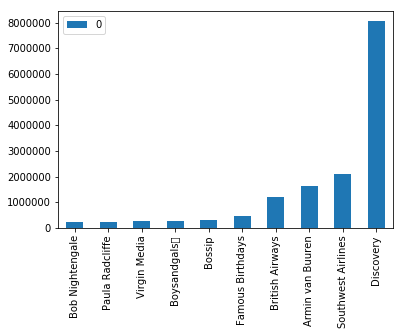

In [3]:
import json
import re
import pandas as pd
from collections import defaultdict
import operator
import matplotlib

counts = defaultdict(int)   # count values are initialized to 0

with open('data.json') as f:
    for line in f:
        tweet = json.loads(line)
        username = tweet['user']['name']
        counts[username] = tweet['user']['followers_count']
            
sorted_users = sorted(counts.items(), key=operator.itemgetter(1))   # note that sorted_hashtags is a list of tuples

frequencies = [h[1] for h in sorted_users[-10:]]   # get the top-10 frequencies
users = [h[0] for h in sorted_users[-10:]]      # get the corresponding usernames

mostFollowers = pd.DataFrame(frequencies, index=users)
mostFollowers.plot(kind='bar')

for i in range(10):
    print(users[i], ':', counts[users[i]])

**4.** Consider the following schema for an online streaming service, where users are allowed to play (stream) songs performed by different artists. Primary and foreign key constraints are also listed for the schema of each table.

    User (ID, Password, Name, Location)   Primary key = ID
    
    Artist (ID, Name, Birthyear)   Primary key = ID

    Song (ID, Title, Album, ArtistID)   
    
        Primary key = ID
        
        Song(ArtistID) references Artist(ID)

    Play (ID, UserID, SongID, Timestamp)   
    
        Primary key = ID

        Play(UserID) references User(ID)

        Play(SongID) references Song(ID)

Express each of the following query in SQL.

**(a)** Find the unique IDs of users who have played songs performed by the artist named *Michael Jackson*.

**Solution:**

  SELECT DISTINCT P.UserID
  
  FROM Play P, Song S, Artist A
  
  WHERE P.SongID = S.ID AND S.ArtistID = A.ID AND A.Name = 'Michael Jackson';


**(b)** Find the unique IDs of users who have played more than one song performed by the artist named *Michael Jackson*. In other words, your query result must include only those users who have played at least 2 different songs performed by Michael Jackson. 

**Solution:**

  SELECT DISTINCT P1.UserID
  
  FROM Play P1, Play P2, Song S1, Song S2, Artist A
  
  WHERE P1.SongID = S1.ID AND P2.SongID = S2.ID AND P1.UserID = P2.UserID AND S1.ID <> S2.ID
  
  AND S1.ArtistID = A.ID AND S2.ArtistID = A.ID AND A.Name = 'Michael Jackson';

**(c)**  Find the title of the most popular song, i.e., the song that received the highest play count (i.e., number of times it was played), and its corresponding play count. Note that a user can play the same song more than once (so the play count should sum up the total number of times each user has played a given song).

**Solution:**

SELECT S.Title, COUNT(*)

FROM Play P, Song S

WHERE P.SongID = S.ID

GROUP BY P.SongID

ORDER BY COUNT(*) DESC

LIMIT 1;

**(d)** Find the titles of songs that have never been streamed (played) by any user.

**Solution:**

SELECT S.Title

FROM Song S

WHERE NOT EXISTS (SELECT * FROM Play P WHERE P.SongID = S.ID);

**5.** Download the Pittsburgh city fire incident data from the class web page. Using Jupyter notebook, write a Python program that performs the following steps.

**(a)** Use pandas to load the CSV file into a DataFrame object named data. After loading the data successfully:

i. Type data.head() to return the first 5 records of the dataset.

**Solution:**

In [4]:
import pandas as pd

data = pd.read_csv('fire.csv', header='infer' ) 
data.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,16-Mar,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,21-Mar,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,10-Jan,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,16-Jan,40.449009,-80.076607


ii. Determine the number of rows (data records) and columns (attributes) of the dataset using the data.shape command.
   
**Solution:**   

In [5]:
print('Number of rows =', data.shape[0])
print('Number of columns =', data.shape[1])

Number of rows = 5956
Number of columns = 18


iii. Count the frequency of each type of fire incident by applying the value_counts() function to the type description column (see the pandas example given in lecture 2).

**Solution:**

In [6]:
data['type_description'].value_counts()

Cooking fire, confined to container                   1388
Building fire                                         1240
Passenger vehicle fire                                 710
Outside rubbish, trash or waste fire                   481
Outside rubbish fire, Other                            329
Brush or brush-and-grass mixture fire                  301
Trash or rubbish fire, contained                       275
Dumpster or other outside trash receptacle fire        275
Special outside fire, Other                            155
Natural vegetation fire, Other                         147
Mobile property (vehicle) fire, Other                  135
Fires in structure other than in a building             91
Fire, Other                                             80
Grass fire                                              80
Outside equipment fire                                  44
Fuel burner/boiler malfunction, fire confined           43
Road freight or transport vehicle fire                  

(b) Using pymongo, write the Python code for storing the data into MongoDB. Specifically, create a collection named fire, where each document corresponds to a fire incident record. You must first convert each record into a dictionary object before inserting it into MongoDB (see the example given in Exercise 3). Each fire incident record should be stored as a set of key-value pairs in BSON format on MongoDB, where the keys should correspond to the attribute names of the original CSV data file.

**Solution:**

In [7]:
import json
from pymongo import MongoClient
try:
    connection = MongoClient('localhost', 27017)
    print("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
    print("Could not connect to MongoDB: %s"%e)
db = connection['test']

for index, row in data.iterrows():
    db.fire.insert_one(row.to_dict())

connection.close()

Connected successfully!!!


(c) Using pymongo, execute a MongoDB query that identifies the top-5 most frequent type of fire incidents. Your result should be consistent with the answer for Question 5(a)(iii). Hint: you will need to use the following MongoDB operators for the query: group, sort, and $limit. See the example given in https://www.mkyong.com/mongodb/mongodb-aggregate-and-group-example/ on how to write queries with aggregate functions. Note that aggregate functions are implemented in pymongo as follows:

    db.<collection_name>.aggregate( ... )

**Solution:**

In [8]:
cursor = db.fire.aggregate([{"$group":{"_id":"$type_description","count":{"$sum":1}}},{"$sort":{"count":-1}}, {"$limit":5}])
print("Description     Count")
print("-----------     -----")
for element in cursor:
    print(element["_id"], element["count"])

Description     Count
-----------     -----
Cooking fire, confined to container 1388
Building fire 1240
Passenger vehicle fire 710
Outside rubbish, trash or waste fire 481
Outside rubbish fire, Other 329
